# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [51]:
df = pd.read_csv(r'C:\Users\vitor\Documents\Anaconda\d889ae62f1\df_quanti.csv')

In [52]:
df.head(5)

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,1,1,1,0,58.832877,3.106849,1,0,0,0,2.0,0
1,1,0,0,1,0,52.356164,8.358904,1,0,1,1,1.0,0
2,2,0,0,1,0,52.356164,8.358904,1,0,1,1,1.0,0
3,3,1,1,1,0,46.224658,2.106849,1,1,1,1,2.0,0
4,4,0,1,0,0,29.230137,3.021918,1,0,0,0,2.0,0


In [53]:
x = df.drop('mau',axis=1)

In [54]:
x = x.drop(columns=['Unnamed: 0'])

In [55]:
y = df.mau

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [57]:
dtc = DecisionTreeClassifier(random_state=100)
dtc

DecisionTreeClassifier(random_state=100)

In [58]:
dtc = dtc.fit(x_train,y_train)

In [59]:
x

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia
0,1,1,1,0,58.832877,3.106849,1,0,0,0,2.0
1,0,0,1,0,52.356164,8.358904,1,0,1,1,1.0
2,0,0,1,0,52.356164,8.358904,1,0,1,1,1.0
3,1,1,1,0,46.224658,2.106849,1,1,1,1,2.0
4,0,1,0,0,29.230137,3.021918,1,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
16645,0,0,1,0,54.109589,9.884932,1,0,0,0,2.0
16646,0,0,1,0,43.389041,7.380822,1,1,1,0,2.0
16647,1,1,1,0,30.005479,9.800000,1,1,0,0,2.0
16648,1,1,1,0,30.005479,9.800000,1,1,0,0,2.0


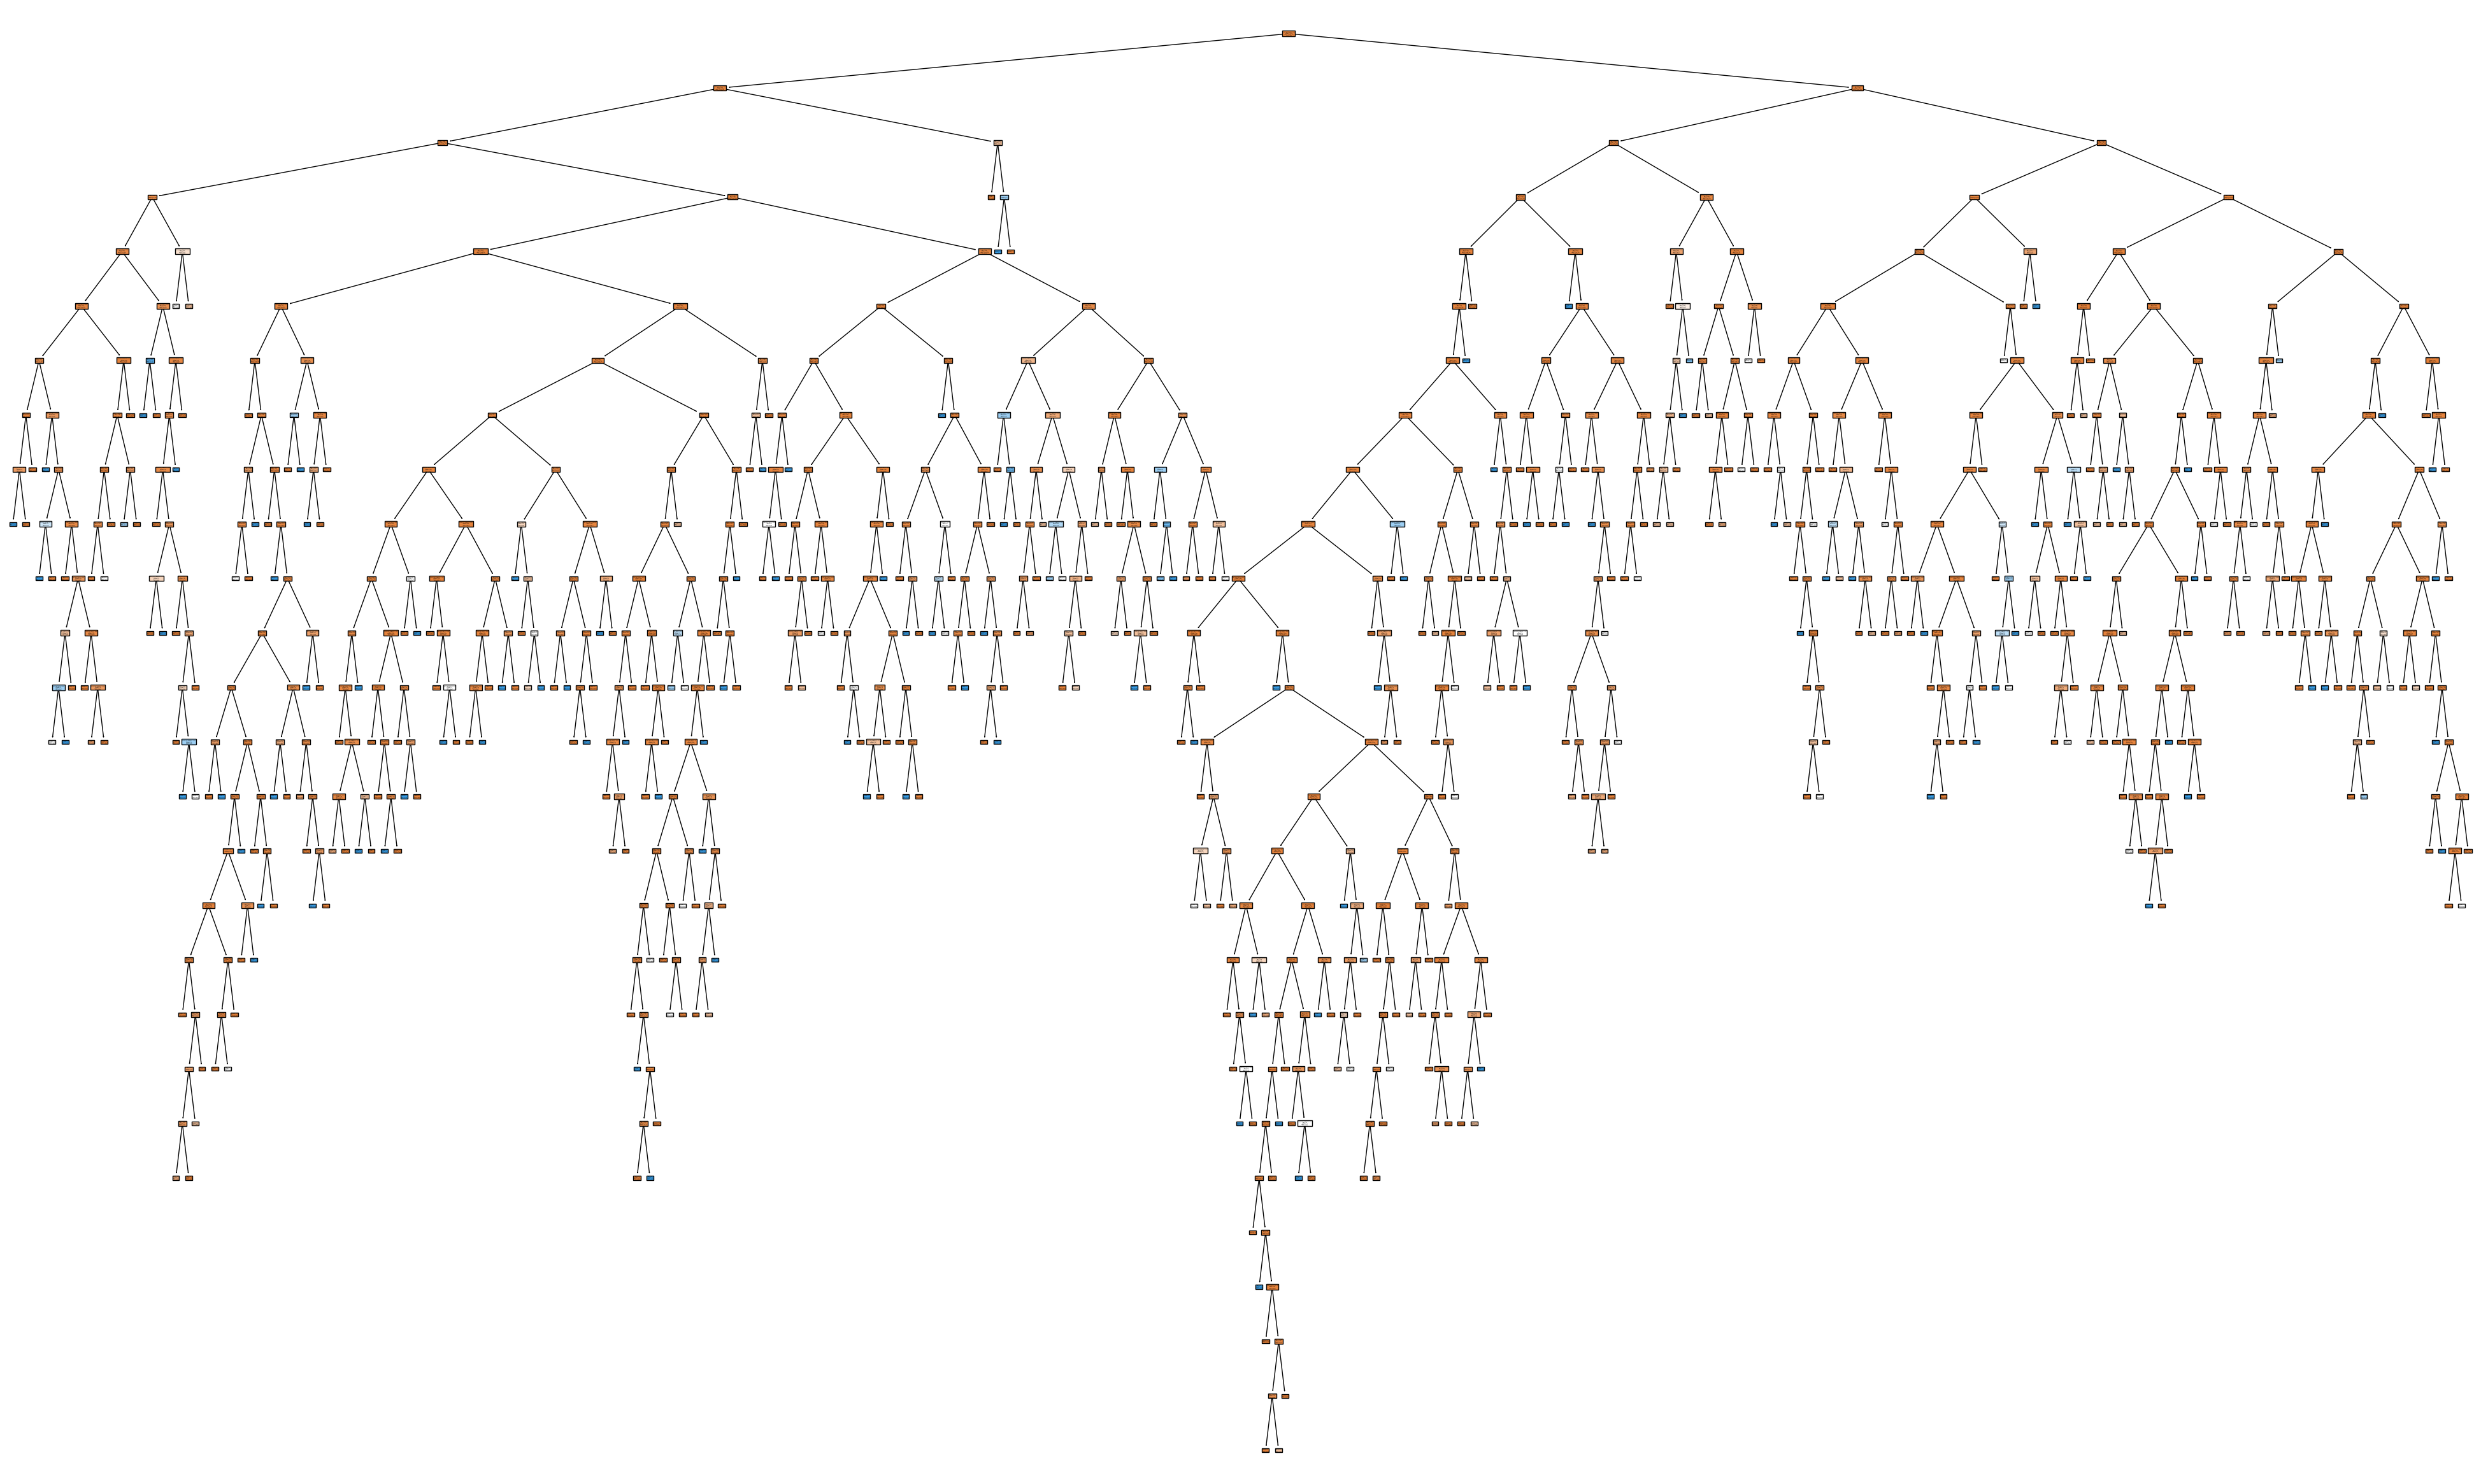

In [60]:
plt.figure(figsize=(50, 30))
plot_tree(dtc,
          filled=True,
          class_names=['mau', 'bom'],
          feature_names=list(x.columns));

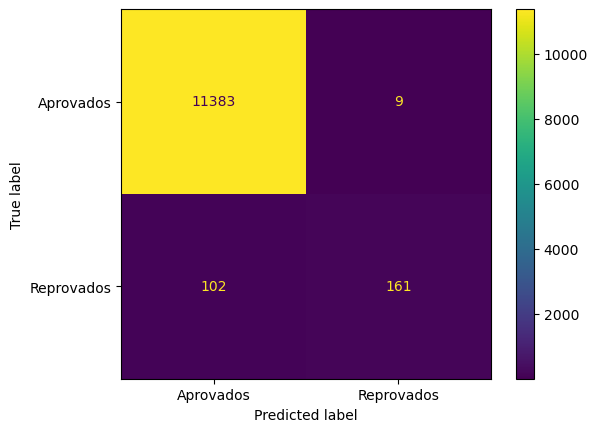

In [61]:
ConfusionMatrixDisplay.from_estimator(dtc, x_train, y_train,display_labels=['Aprovados', 'Reprovados'])

In [62]:
y.value_counts()

mau
0    16260
1      390
Name: count, dtype: int64

In [70]:
predict = dtc.predict(x_train)

In [75]:
acuracia_treino = accuracy_score(y_train,predict)
acuracia_treino

0.9904761904761905

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [65]:
dtc_teste = DecisionTreeClassifier(random_state=100)
dtc_teste

DecisionTreeClassifier(random_state=100)

In [66]:
dtc_teste = dtc_teste.fit(x_test,y_test)

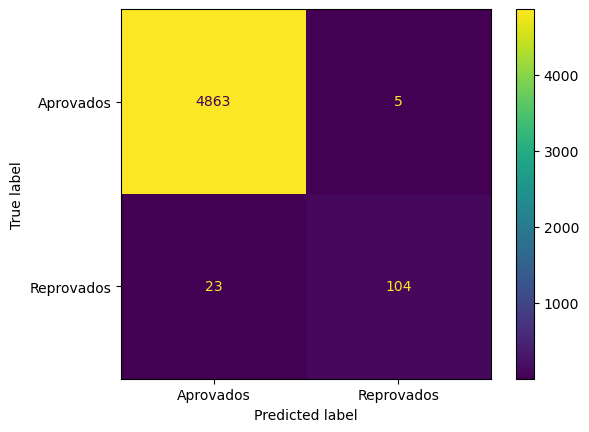

In [67]:
ConfusionMatrixDisplay.from_estimator(dtc_teste, x_test, y_test,display_labels=['Aprovados', 'Reprovados'])

In [77]:
predict_2 = dtc_teste.predict(x_test)
acuracia_teste = accuracy_score(y_test,predict_2)
acuracia_teste

0.9943943943943944

In [78]:
acuracia_treino

0.9904761904761905

pode-se perceber que a acurácia de teste foi um pouco maior que a de treino

In [79]:
acuracia_teste-acuracia_treino

0.003918203918203855

In [81]:
arvore = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf=5)
arvore

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [82]:
arvore = arvore.fit(x,y)

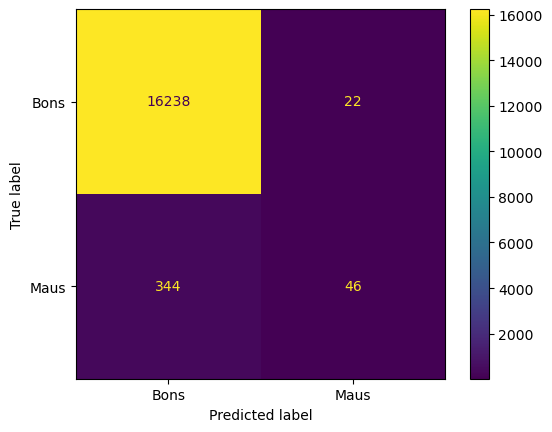

In [83]:
ConfusionMatrixDisplay.from_estimator(arvore, x, y, display_labels=['Bons', 'Maus'])

In [87]:
print('A proporção de proponentes foram classificados como maus foi de')
(22/(22+344))*100

A proporção de proponentes foram classificados como maus foi de


6.0109289617486334

In [91]:
y_bom = y.replace(to_replace=0,value=1)


mau
1    16650
Name: count, dtype: int64

In [92]:
bom = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf=5)

In [94]:
bom = bom.fit(x,y_bom)

In [96]:
predicao= bom.predict(x)
acuracia_bom = accuracy_score(y_bom,predicao)
acuracia_bom

1.0